<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/filter_visualiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

torch.Size([256, 256, 3, 3])


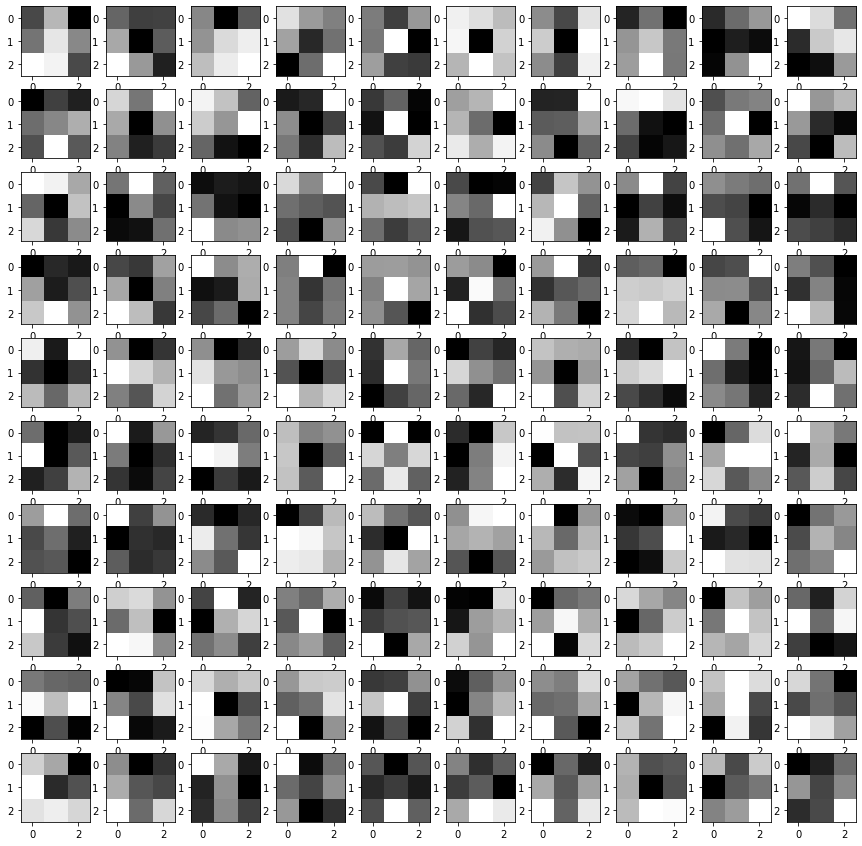

In [ ]:
import torch.nn as nn
import matplotlib.pyplot as plt

def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    print(weight_tensor.shape)
    
    # if single_channel:
    #   if collated:
          # columns = 10 
          # rows = 10
          # fig = plt.figure(figsize=(10, 10))
          # for i in range(1, columns*rows + 1):
          #   img = weight_tensor[i-1].permute(1, 2, 0)
          #   img = img.cpu().detach().numpy()
          #   fig.add_subplot(rows, columns, i)
          #   plt.imshow(img)
          # plt.show()

      #   for i in weight_tensor:
      #     plt.imshow(weight_tensor[i])
      # else:
      #   for i in weight_tensor:
      #     plt.imshow(weight_tensor[i])
        
    # else:
    #   if weight_tensor.shape[1] == 3:
    columns = 10
    rows = 10
    fig = plt.figure(figsize=((15, 15)))
    for i in range(1, columns*rows + 1):
      img = weight_tensor[1][i-1]
      # print(img.shape)
      img = img.cpu().detach().numpy()
      fig.add_subplot(rows, columns, i)
      plt.imshow(img, cmap='gray')
    plt.show()
          
      # else:
      #   print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")
        
#visualize weights for alexnet - first conv layer
plot_weights(alexnet,10, single_channel = False)